In [1]:
import pandas as pd
import numpy as np

In [51]:
train = pd.read_excel("Dr_Train.xlsx")
test = pd.read_excel("Dr_Test.xlsx")
sample = pd.read_excel("Dr_Sample.xlsx")

In [52]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [53]:
train.isnull().sum()/len(train)*100

Qualification          0.000000
Experience             0.000000
Rating                55.393390
Place                  0.419393
Profile                0.000000
Miscellaneous_Info    43.952357
Fees                   0.000000
dtype: float64

In [54]:
train['Experience'] = train['Experience'].str.split(" ").str[0].astype(int)

In [55]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [56]:
train.dtypes

Qualification         object
Experience             int32
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [57]:
train['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [58]:
train['Place'].fillna("Unknown,Unknown",inplace=True)
train['City'] = train["Place"].str.split(',').str[-1]
train["Place"]= train['Place'].str.split(",").str[0]

In [59]:
train.head()
#using df for practice purpose
df=train.copy()

In [60]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,"BHMS, MD - Homeopathy",24,100%,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,Mathikere - BEL,ENT Specialist,NaN,300,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore
4,BAMS,20,100%,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai


In [61]:
train['Rating'].fillna("-99%",inplace=True)
train["Rating"]=train["Rating"].str[:-1].astype('int')

bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels=[i for i in range(11)] #or [0,1,2,3,4,5,6,7,8,9,10]
train['Rating'] = pd.cut(train['Rating'],bins=bins,labels=labels,include_lowest=True)

In [62]:
#bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
#labels=[i for i in range(11)] #or [0,1,2,3,4,5,6,7,8,9,10]
#df['Rating'] = pd.cut(df['Rating'],bins=bins,labels=labels,include_lowest=True)

In [63]:
#df['Rating'].fillna("-99%",inplace=True)
#df.head()

In [64]:
#for practice
#df["Rating"].str[:-1].head()

In [65]:
train.dtypes

Qualification           object
Experience               int32
Rating                category
Place                   object
Profile                 object
Miscellaneous_Info      object
Fees                     int64
City                    object
dtype: object

In [66]:
train.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                    0
Profile                  0
Miscellaneous_Info    2620
Fees                     0
City                     0
dtype: int64

In [67]:
train.head()
#df=train.copy()
#train=df.copy()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,"BHMS, MD - Homeopathy",24,10,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,10,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,0,Mathikere - BEL,ENT Specialist,NaN,300,Bangalore
3,"BSc - Zoology, BAMS",12,0,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore
4,BAMS,20,10,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai


In [68]:
train.head()
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,"BHMS, MD - Homeopathy",24,100%,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,Mathikere - BEL,ENT Specialist,NaN,300,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore
4,BAMS,20,100%,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai


In [69]:
#train['Qualification']=train['Qualification'].str.split(",")
#Qualification={}

In [70]:
train['Qualification'].values

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ..., 'MBBS',
       'MBBS, MD - General Medicine', 'BDS, MDS - Orthodontics'],
      dtype=object)

In [71]:
train['Qualification']=train['Qualification'].str.split(",")
Qualification={}
for x in train['Qualification'].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each] += 1
        else:
            Qualification[each] = 1
        

In [72]:
train['Qualification'].values

array([list(['BHMS', ' MD - Homeopathy']),
       list(['BAMS', ' MD - Ayurveda Medicine']),
       list(['MBBS', ' MS - Otorhinolaryngology']), ..., list(['MBBS']),
       list(['MBBS', ' MD - General Medicine']),
       list(['BDS', ' MDS - Orthodontics'])], dtype=object)

In [73]:
#train.head()

In [74]:
#train['Qa'] = train['Qualification'].str.split(",").str[0]
#train['Qb'] = train['Qualification'].str.split(",").str[1]

In [75]:
#train.shape

In [76]:
#train['Qa'].isnull().sum()

In [77]:
#train['Qb'].isnull().sum()

In [78]:
#train['Qa'].value_counts()

In [79]:
#train['Qb'].value_counts()

In [80]:
#train.head(20)

In [81]:
#train[train.Qualification == "FPFA"]

In [82]:
# Python code to illustrate the working of strip() 
#string = '   Geeks for Geeks   '
  
# Leading spaces are removed 
#print(string.strip()) 
  
# Geeks is removed 
#print(string.strip('   Geeks')) 
  
# Not removed since the spaces do not match 
#print(string.strip('Geeks')) 
#test_dict = {"Geeks" : 1, "for" : 2, "geeks" : 3} 
#test_dict["Geeks"]

In [83]:
Qualification.items()
#test1 = sorted(Qualification.items(),reverse=True )
#test1

dict_items([('BHMS', 749), ('MD - Homeopathy', 181), ('BAMS', 764), ('MD - Ayurveda Medicine', 139), ('MBBS', 2808), ('MS - Otorhinolaryngology', 103), ('BSc - Zoology', 3), ('BDS', 1363), ('MD - General Medicine', 285), ('BSc', 3), ('MS', 2), ('DNB - ENT', 111), ('MDS', 82), ('MDS - Oral & Maxillofacial Surgery', 104), ('Diploma in Otorhinolaryngology (DLO)', 250), ('MF- Homeopathy', 5), ('MS - ENT', 411), ('DNB', 58), ('Fellowship of College of General Practice (FCGP)', 13), ('DDVL', 161), ('IBCLC (USA)', 1), ('Post Graduate Diploma in Diabetology (PGDD)', 53), ('Diploma in Dermatology', 67), ('Fellowship in Aesthetic Medicine', 23), ('DM - Neurology', 6), ('MD - Pediatrics', 13), ('Fellowship in Cleft Lip and Craniofacial Surgery', 1), ('Diploma in Cosmetology', 3), ('AFIH', 4), ('MDS - Prosthodontist And Crown Bridge', 45), ('M. D. Hom. (Practice of Medicine)', 2), ('Diploma in Emergency Medicine', 8), ('Diploma in Counselling Skills', 2), ('DHMS (Diploma in Homeopathic Medicine an

In [84]:
most_qua = sorted(Qualification.items(),key = lambda x:x[1],reverse=True )[:10]
most_qua

[('MBBS', 2808),
 ('BDS', 1363),
 ('BAMS', 764),
 ('BHMS', 749),
 ('MD - Dermatology', 606),
 ('MS - ENT', 411),
 ('Venereology & Leprosy', 297),
 ('MD - General Medicine', 285),
 ('Diploma in Otorhinolaryngology (DLO)', 250),
 ('MD - Homeopathy', 181)]

In [85]:
final_qua = []
for tup in most_qua:
    final_qua.append(tup[0])

In [86]:
final_qua

['MBBS',
 'BDS',
 'BAMS',
 'BHMS',
 'MD - Dermatology',
 'MS - ENT',
 'Venereology & Leprosy',
 'MD - General Medicine',
 'Diploma in Otorhinolaryngology (DLO)',
 'MD - Homeopathy']

In [87]:
for title in final_qua:
    train[title] = 0

In [88]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,"[BHMS, MD - Homeopathy]",24,10,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,0,0,0,0,0,0,0,0,0,0
1,"[BAMS, MD - Ayurveda Medicine]",12,10,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,0,0,0,0,0,0,0,0,0,0
2,"[MBBS, MS - Otorhinolaryngology]",9,0,Mathikere - BEL,ENT Specialist,NaN,300,Bangalore,0,0,0,0,0,0,0,0,0,0
3,"[BSc - Zoology, BAMS]",12,0,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,0,0,0,0,0,0,0,0,0,0
4,[BAMS],20,10,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,0,0,0,0,0,0,0,0,0,0


In [89]:
for x,y in zip(train['Qualification'].values,np.array([idx for idx in range(len(train))])):
    for q in x:
        q=q.strip()
        if q in final_qua:
            train[q][y]=1           

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [90]:
train.drop("Qualification",inplace=True,axis=1)
df['Qualification'].values

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ..., 'MBBS',
       'MBBS, MD - General Medicine', 'BDS, MDS - Orthodontics'],
      dtype=object)

In [91]:
train.head(10)

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,Mathikere - BEL,ENT Specialist,NaN,300,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,10,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,0,0,1,0,0,0,0,0,0,0
5,8,0,Porur,Ayurveda,NaN,100,Chennai,0,0,1,0,0,0,0,0,0,0
6,42,0,Karol Bagh,Homeopath,NaN,200,Delhi,0,0,0,1,0,0,0,0,0,0
7,10,10,Arekere,Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200,Bangalore,0,1,0,0,0,0,0,0,0,0
8,14,0,Old City,General Medicine,NaN,100,Hyderabad,1,0,0,0,0,0,0,1,0,0
9,23,0,Athani,Dentist,NaN,100,Ernakulam,0,1,0,0,0,0,0,0,0,0


In [92]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [93]:
train['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [94]:
train.City.value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Unknown                  25
e                         1
Name: City, dtype: int64

In [95]:
train[train.City == "e"]['City']

3980    e
Name: City, dtype: object

In [96]:
train[train.City == "e"]['Place']

3980    e
Name: Place, dtype: object

In [97]:
train[train.City == "e"]

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
3980,23,0,e,Dentist,NaN,250,e,0,1,0,0,0,0,0,0,0,0


In [99]:
train['City'] = train['City'].replace("e","Unknown")
train['Place'] = train['Place'].replace("e","Unknown")

In [101]:
train.head()

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,Mathikere - BEL,ENT Specialist,NaN,300,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,10,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,0,0,1,0,0,0,0,0,0,0


In [104]:
train['Place'].value_counts()

HSR Layout              75
Andheri West            70
Dwarka                  68
Banjara Hills           64
Mulund West             54
Borivali West           52
Kandivali West          50
Indiranagar             48
Malleswaram             47
Malad West              47
Whitefield              47
Pitampura               45
Andheri East            43
Vileparle West          43
Powai                   42
Jubilee Hills           40
Bannerghatta Road       39
Marathahalli            39
Kondapur                38
Ghatkopar East          38
Bandra West             38
Adyar                   37
Janak Puri              37
Secunderabad            37
Rohini                  37
Shalimar Bagh           36
Paschim Vihar           36
Koramangala             35
KPHB                    35
Old Rajendra Nagar      34
                        ..
Jeevan Park              1
Koramangala 8 Block      1
Saraswati Vihar          1
Kattupakkam              1
Dwarka Sector 4          1
Chanchalguda             1
M

In [105]:
#we will use get dummies for city, profile

In [106]:
train = pd.get_dummies(train,columns=['Profile','City'],prefix= ['Profile','City'])

In [107]:
train.head()

,Experience,Rating,Place,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,...,Profile_Homeopath,City_ Bangalore,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown
0,24,10,Kakkanad,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1,12,10,Whitefield,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,9,0,Mathikere - BEL,NaN,300,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,12,0,Bannerghatta Road,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,20,10,Keelkattalai,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [108]:
train.drop("Miscellaneous_Info",inplace=True,axis=1)

In [109]:
train.head()

,Experience,Rating,Place,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,...,Profile_Homeopath,City_ Bangalore,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown
0,24,10,Kakkanad,100,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1,12,10,Whitefield,350,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,9,0,Mathikere - BEL,300,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,12,0,Bannerghatta Road,250,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,20,10,Keelkattalai,250,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [110]:
train['Place']=le.fit_transform(train['Place'].values.reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [111]:
train.dtypes

Experience                                 int32
Rating                                  category
Place                                      int32
Fees                                       int64
MBBS                                       int64
BDS                                        int64
BAMS                                       int64
BHMS                                       int64
MD - Dermatology                           int64
MS - ENT                                   int64
Venereology & Leprosy                      int64
MD - General Medicine                      int64
Diploma in Otorhinolaryngology (DLO)       int64
MD - Homeopathy                            int64
Profile_Ayurveda                           uint8
Profile_Dentist                            uint8
Profile_Dermatologists                     uint8
Profile_ENT Specialist                     uint8
Profile_General Medicine                   uint8
Profile_Homeopath                          uint8
City_ Bangalore     

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
train.columns

Index(['Experience', 'Rating', 'Place', 'Fees', 'MBBS', 'BDS', 'BAMS', 'BHMS',
       'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy',
       'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)',
       'MD - Homeopathy', 'Profile_Ayurveda', 'Profile_Dentist',
       'Profile_Dermatologists', 'Profile_ENT Specialist',
       'Profile_General Medicine', 'Profile_Homeopath', 'City_ Bangalore',
       'City_ Chennai', 'City_ Coimbatore', 'City_ Delhi', 'City_ Ernakulam',
       'City_ Hyderabad', 'City_ Mumbai', 'City_ Thiruvananthapuram',
       'City_Unknown'],
      dtype='object')

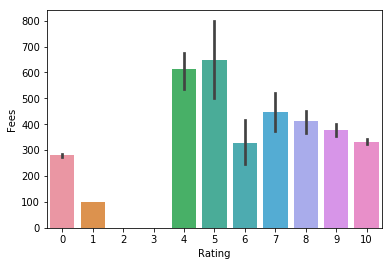

In [115]:
sns.barplot(data=train,x="Rating",y="Fees")

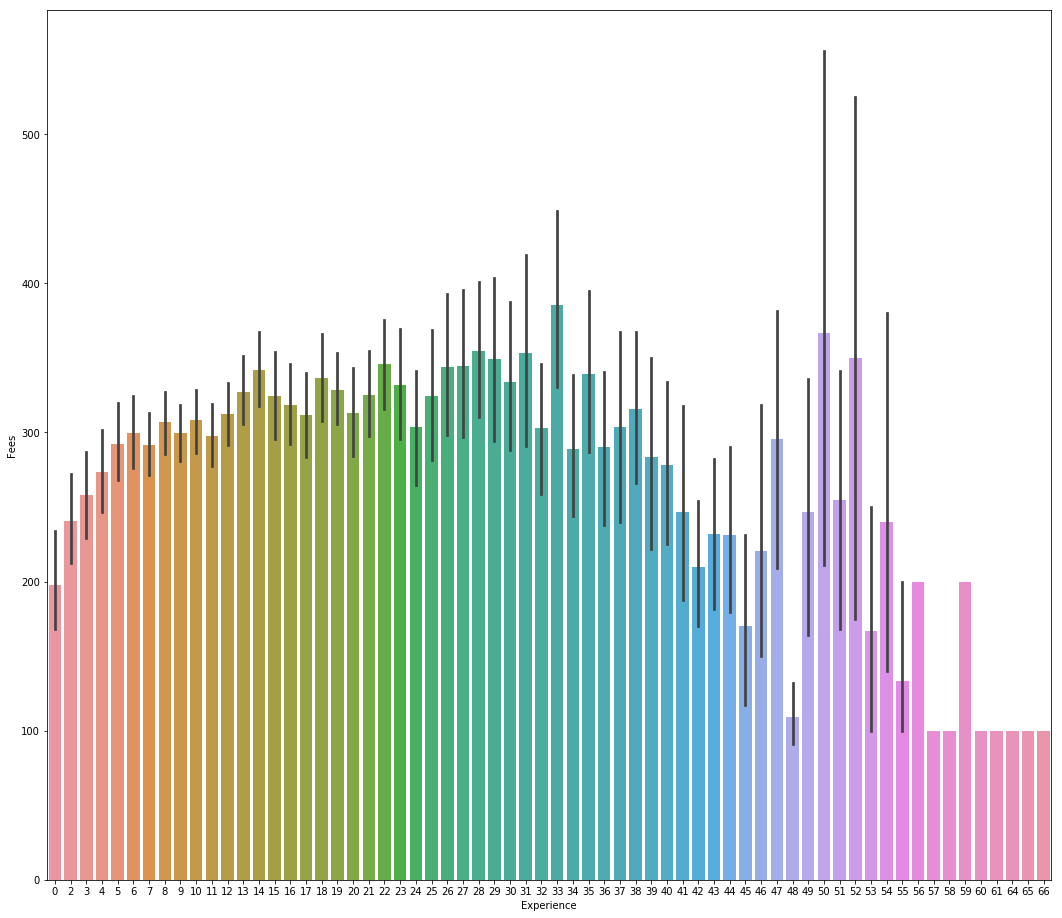

In [125]:
plt.figure(figsize=(18,16))
sns.barplot(data=train,x="Experience",y="Fees")
plt.show()

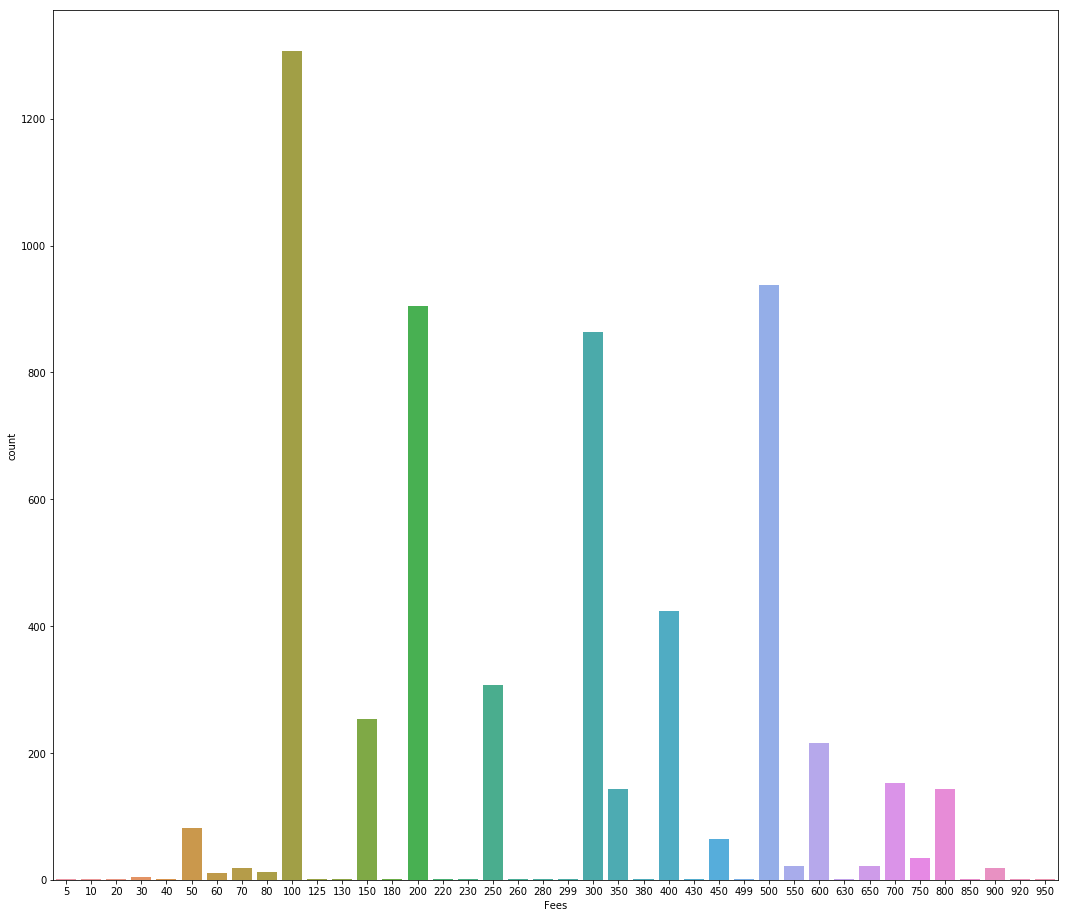

In [128]:
plt.figure(figsize=(18,16))
sns.countplot(data=train,x="Fees")

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [130]:
lr=LinearRegression()

In [131]:
x=train.drop("Fees",axis=1)
y=train.Fees

In [132]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=47,test_size=0.33)

In [133]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.18829427383695063

In [134]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [135]:
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8394428186851801

In [136]:
pred= rfr.predict(x_test)

In [138]:
r2_score(y_test,pred)

0.10941801180547261

In [139]:
mean_squared_error(y_test,pred)

32932.18653096943

In [140]:
y.head()

0    100
1    350
2    300
3    250
4    250
Name: Fees, dtype: int64

In [141]:
x.head()

,Experience,Rating,Place,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,...,Profile_Homeopath,City_ Bangalore,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown
0,24,10,296,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,12,10,856,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,9,0,452,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,12,0,68,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,20,10,335,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [155]:
from sklearn.model_selection import GridSearchCV,cross_val_score


In [152]:
#alphas = np.array([0.1,1,10])
#score = GridSearchCV(lr,cv=5,param_grid=dict(alpha=alphas) )

In [156]:
#score.fit(x_train,y_train)

In [157]:
cvs = cross_val_score(rfr,x,y,cv=5)

In [158]:
cvs

array([0.0423032 , 0.10053722, 0.13838224, 0.09394059, 0.08023379])

In [159]:
cvs.mean()

0.09107940818624671

In [160]:
cvs.std()

0.031086782266481844

In [163]:
#cvs = cross_val_score(rfr,x,y,cv=5)

In [164]:
import pickle

In [165]:
smod = pickle.dumps(rfr)

In [166]:
lmod = pickle.loads(smod)

In [168]:
lmod.predict(x_test)

array([270., 170., 345., ..., 370., 465., 355.])

array([200, 100, 500, ..., 100, 300, 400], dtype=int64)